In [23]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.interpolate as itp
from classy import Class
import matplotlib as mpl

cosmo = Class()
cosmo.compute()

In [24]:
Bin1, Bin2, kmin, kmax = 0, 0, 0.001, 100
npoints = 1000      # changes image resolution

load_archive = np.load("k_of_l_plot.npz")
ks = load_archive['ks']
ls_LL = load_archive['ls_LL']
ls_GG = load_archive['ls_GG']
Cl_LL_int_cum = load_archive['Cl_LL_int_cum']
Cl_GG_int_cum = load_archive['Cl_GG_int_cum']
Cl_LL_int = np.load("Cl_LL_int.npy")
Cl_GG_int = np.load("Cl_GG_int.npy")

points0, points1 = [], []

# optional: add noise
# noise_LL = 0.3**2. / (30 * (60.*180./np.pi)**2) / 10
# noise_GG =       1 / (30 * (60.*180./np.pi)**2) / 10
# Cl_LL_int_cum[:,Bin1,Bin2,:] += noise_LL / len(Cl_LL_int_cum[0,0,0,:])
# Cl_GG_int_cum[:,Bin1,Bin2,:] += noise_GG / len(Cl_GG_int_cum[0,0,0,:])

for index_l in range(len(ls_LL)):
    for index_k in range(len(ks[0,:])):
        points0.append((ls_LL[index_l], ks[index_l, index_k]))

for index_l in range(len(ls_GG)):
    for index_k in range(len(ks[0,:])):
        points1.append((ls_GG[index_l], ks[index_l, index_k]))

for index_l, ll in enumerate(ls_LL):
    ks_to_probe = np.where((Cl_LL_int[index_l,Bin1,Bin2,:]!=0))[0]
    Cl_LL_int_cum[index_l,Bin1,Bin2,ks_to_probe] /= np.amax(Cl_LL_int_cum[index_l,Bin1,Bin2,ks_to_probe])

for index_l, ll in enumerate(ls_GG):
    ks_to_probe = np.where((Cl_GG_int[index_l,Bin1,Bin2,:]!=0))[0]
    Cl_GG_int_cum[index_l,Bin1,Bin2,ks_to_probe] /= np.amax(Cl_GG_int_cum[index_l,Bin1,Bin2,ks_to_probe])


# for index_l, ll in enumerate(ls_LL):
#     ks_to_probe = np.where((Cl_LL_int[index_l,Bin1,Bin2,:]==0) & (ks[index_l,:] > 1.1))[0]
#     Cl_LL_int_cum[index_l,Bin1,Bin2,ks_to_probe] = 1

Cl_LL_int_cum[:,Bin1,Bin2,:50] = 1
Cl_GG_int_cum[:,Bin1,Bin2,:50] = 1

Cls_LL = Cl_LL_int_cum[:,Bin1,Bin2,:].flatten()
Cls_GG = Cl_GG_int_cum[:,Bin1,Bin2,:].flatten()

for index_l, ll in enumerate(ls_LL):
    if ks[index_l, 0] < kmax:
        num_ks_extra = 1000
        ks_extra = np.logspace(np.log10(ks[index_l, 0])-0.2, np.log10(kmax), num_ks_extra)
        for ik, k_extra in enumerate(ks_extra):
            points0.append((ll, k_extra))
            np.append(Cls_LL, np.array([1]))
        Cls_LL = np.append(Cls_LL, np.ones(num_ks_extra))

for index_l, ll in enumerate(ls_GG):
    if ks[index_l, 0] < kmax:
        num_ks_extra = 1000
        ks_extra = np.logspace(np.log10(ks[index_l, 0])-0.2, np.log10(kmax), num_ks_extra)
        for ik, k_extra in enumerate(ks_extra):
            points1.append((ll, k_extra))
            np.append(Cls_GG, np.array([1]))
        Cls_GG = np.append(Cls_GG, np.ones(num_ks_extra))

print("Begin interpolation")

inter0 = itp.LinearNDInterpolator(points0, Cls_LL)
X0 = np.linspace(ls_LL[0], ls_LL[-1], npoints)
Y0 = np.logspace(np.log10(kmin), np.log10(kmax), npoints)
X0, Y0 = np.meshgrid(X0, Y0)
Z0 = inter0(X0, Y0)

inter1 = itp.LinearNDInterpolator(points1, Cls_GG)
X1 = np.linspace(ls_GG[0], ls_GG[-1], npoints)
Y1 = np.logspace(np.log10(kmin), np.log10(kmax), npoints)
X1, Y1 = np.meshgrid(X1, Y1)
Z1 = inter1(X1, Y1)

Begin interpolation


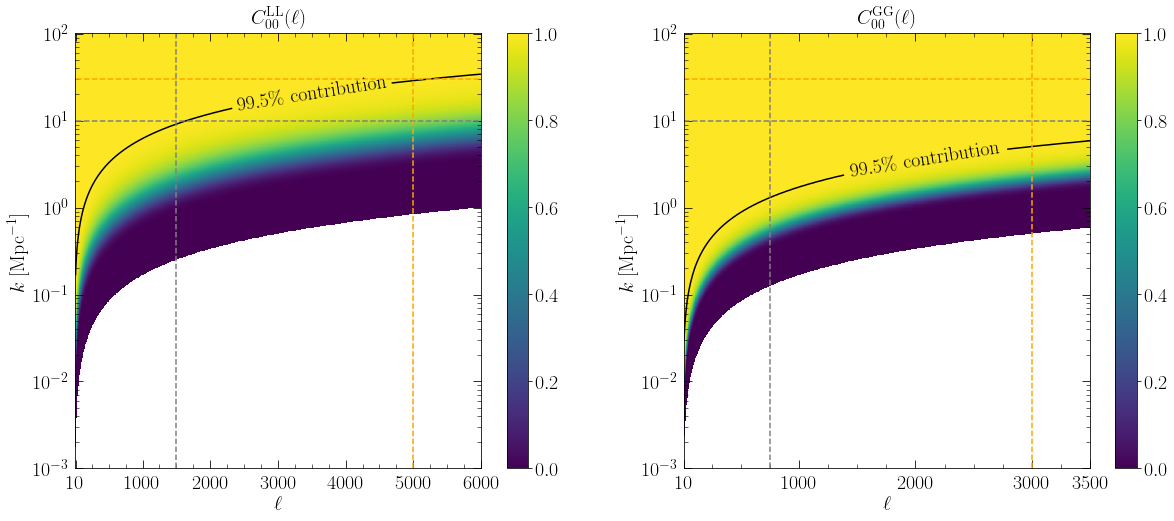

In [25]:
mpl.rcParams['text.usetex'] = True

fontsize = 20

fig, axs = plt.subplots(1, 2)
fig.set_figheight(8)
fig.set_figwidth(20)

plot0 = axs[0].pcolormesh(X0, Y0, Z0)
axs[0].set_yscale("log")
axs[0].set_ylabel("$k\;[\mathrm{Mpc}^{-1}]$", fontsize=fontsize)
axs[0].set_xlabel("$\ell$", fontsize=fontsize)
axs[0].set_title (r"$ C^\mathrm{LL}_{%s%s}(\ell) $" % (Bin1, Bin2), fontsize=fontsize, pad=10)
cbar0 = plt.colorbar(plot0, ax=axs[0])
cbar0.ax.tick_params(labelsize=fontsize)
c0 = axs[0].contour(X0, Y0, Z0, levels=[0.995], colors=["black"])
axs[0].hlines(10,   ls_LL[0], ls_LL[-1], linestyle='dashed', color='grey')
axs[0].hlines(30,   ls_LL[0], ls_LL[-1], linestyle='dashed', color='orange')
axs[0].vlines(1500, kmin, kmax, linestyle='dashed', color="grey")
axs[0].vlines(5000, kmin, kmax, linestyle='dashed', color="orange")
axs[0].clabel(c0, c0.levels, inline=True, fmt={0.995: '$99.5\%\mathrm{\;contribution}$'}, fontsize=fontsize, manual=[(3500, 20)])

plot1 = axs[1].pcolormesh(X1, Y1, Z1)
axs[1].set_yscale("log")
axs[1].set_ylabel("$k\;[\mathrm{Mpc}^{-1}]$", fontsize=fontsize)
axs[1].set_xlabel("$\ell$", fontsize=fontsize)
axs[1].set_title (r"$C^\mathrm{GG}_{%s%s}(\ell)$" % (Bin1, Bin2), fontsize=fontsize, pad=10)
cbar1 = plt.colorbar(plot1, ax=axs[1])
cbar1.ax.tick_params(labelsize=fontsize) 
c1 = axs[1].contour(X1, Y1, Z1, levels=[0.995], colors=["black"])
axs[1].hlines(10,  ls_GG[0], ls_GG[-1], linestyle='dashed', color='grey')
axs[1].hlines(30,  ls_GG[0], ls_GG[-1], linestyle='dashed', color='orange')
axs[1].vlines(750, kmin, kmax, linestyle='dashed', color="grey", label="pessimistic case")
axs[1].vlines(3000, kmin, kmax, linestyle='dashed', color="orange", label="optimistic case")
a = axs[1].clabel(c1, c1.levels, inline=True, fmt={0.995: '$99.5\%\mathrm{\;contribution}$'}, fontsize=fontsize, manual=[(2000, 20)])

axs[0].tick_params(length=8, labelsize=fontsize)
axs[0].tick_params(length=4, labelsize=fontsize, which="minor")
axs[0].tick_params(direction='in', which="both", pad=6, right=True, top=True)
axs[1].tick_params(length=8, labelsize=fontsize)
axs[1].tick_params(length=4, labelsize=fontsize, which="minor")
axs[1].tick_params(direction='in', which="both", pad=6, right=True, top=True)

LL_xlabelpos = [10, 1000, 2000, 3000, 4000, 5000, 6000]
LL_xlabels = ["$10$", "$1000$", "$2000$", "$3000$", "$4000$", "$5000$", "$6000$"]
axs[0].set_xticks(LL_xlabelpos, LL_xlabels, fontsize=fontsize)
LL_xlabelpos_minor = np.linspace(250, 5750, num=23)
axs[0].set_xticks(LL_xlabelpos_minor, ["" for x in LL_xlabelpos_minor], minor=True)

GG_xlabelpos = [10, 1000, 2000, 3000, 3500]
GG_xlabels = ["$10$", "$1000$", "$2000$", "$3000$", "$3500$"]
axs[1].set_xticks(GG_xlabelpos, GG_xlabels, fontsize=fontsize)
GG_xlabelpos_minor = np.linspace(250, 3250, num=13)
axs[1].set_xticks(GG_xlabelpos_minor, ["" for x in GG_xlabelpos_minor], minor=True)

axs[1].set_xlim(ls_GG[0], 3500)

fig.savefig("cl_plot.png", bbox_inches = "tight")